In [58]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 

In [59]:
# Loading titanic dataset
titanic = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")
titanic_tests

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
# Replacing missing vallues
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

titanic_test["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic_test["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

In [64]:
# Converting categorical variables to numerical representations
label_encoder = LabelEncoder()
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])
titanic["Embarked"] = label_encoder.fit_transform(titanic["Embarked"])


titanic_test["Sex"] = label_encoder.fit_transform(titanic_test["Sex"])
titanic_test["Embarked"] = label_encoder.fit_transform(titanic_test["Embarked"])

In [70]:
# Separating titanic_data into feautures and target
features = ["Pclass", "Embarked", "Sex", "Parch"]
X = titanic[features]
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Counter(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.7988826815642458


In [73]:
pd.DataFrame({"Name":titanic_test["Name"][0:179], "Survived":y_pred})

,Name,Survived
0,"Kelly, Mr. James",1
1,"Wilkes, Mrs. James (Ellen Needs)",0
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
174,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",0
175,"Brown, Miss. Edith Eileen",0
176,"Sincock, Miss. Maude",0
177,"Stengel, Mr. Charles Emil Henry",1


# Week 2 Task: Data Wrangling

## Loading Dataset

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Online Retail_csv.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


## Identifying missing values in Retail Dataset

In [7]:
#identifying cols with missing vals
print("No of missing Values in columns: \n", df.isnull().sum())
missing_vals_cust = df["CustomerID"].isnull().sum() #sum of missing vals in customerID
missing_vals_descrp = df["Description"].isnull().sum() #sum of missing vals in description column
total = df["CustomerID"].shape[0]
total
print(f"Percentage of missing values in CustomerID:{round(missing_vals_cust/total * 100)}")
print(f"Percentage of missing values in Description:{missing_vals_descrp/total}")

No of missing Values in columns: 
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Percentage of missing values in CustomerID:25
Percentage of missing values in Description:0.002683107311375157


## Handling missing values for Description column

In [8]:
#Number of missing vals in Descrp col is very small, almost insignificant, hence the strategic approach will be to delete thee column
df1 = df.dropna(subset=["Description"])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


## Handling missing values for CustomerID column

In [9]:
#The IDs in the customer data are not unique, they are repeated for some customers. 
df2 = df1.fillna(method="bfill") #filled the null values with the next CustomerID
df2.isnull().sum()

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31188\2915017051.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df1.fillna(method="bfill") #filled the null values with the next CustomerID


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Checking Duplicate values in rows

In [75]:
dup = df2[df2.duplicated()]
dup
no_dup = df2.drop_duplicates(inplace=True) #Removing all duplicates in the Retail Dataset

0

## Data type mismatches

In [11]:
print(df2.dtypes) 
# No mismatched dtypes 

# df2["CustomerID"] = df2["CustomerID"].astype("int64")
# df2

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


## Invalid values - Quantity

In [92]:
df2.loc[df2['Quantity'] < 0, 'Quantity'] = np.nan #replaced negattive values with nan
for i in df2["Quantity"]:
    counter = 0
    if i < 0:
        counter += 1

print(counter)


#QUANTITY VALS SHOULD NOT BE NEGATIVE. replaced all negative quantity with nan

0


## Inconsistent Formatting

In [ ]:

#Checking for inconsistent date formatting in Retail data
pattern = r'\d{4}-\d{2}-\d{2}'  # Example for YYYY-MM-DD
inconsistent_dates = df2[~df2['InvoiceDate'].astype(str).str.match(pattern)]
print(len(inconsistent_dates))
print(len(df2["CustomerID"]))
#The pattern matches the pattern, hence nom inconsistent date format

## Outliers 

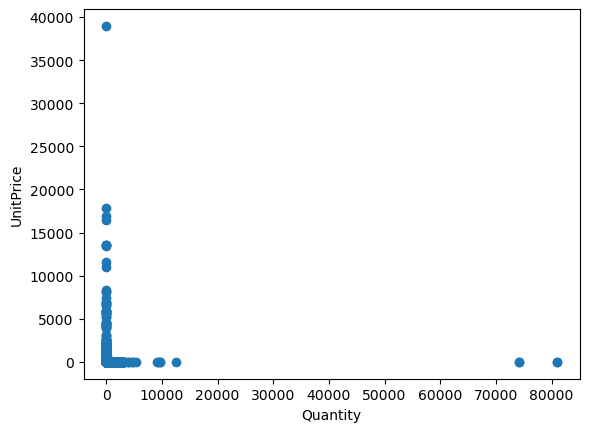

In [99]:
plt.scatter(df2["Quantity"], df2["UnitPrice"], marker="o")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

In [103]:

df2.to_csv("Retail.csv", index=False)